### Wf opto 7/19 - 4 positions, diff powers 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import scipy

import pytoolsAL as ptAL

pytoolsAL: Modules missing.  Not loading neuropixels.  Message: No module named 'slidingRP'


In [2]:
serverPath = Path(r'Z:\Subjects\ZYE_0069\2023-07-19\1')
timeFile = serverPath / 'cameraFrameTimes.npy'
frameTimes = np.squeeze(np.load(timeFile))[::2] # every other frame - we want blue only
svdTemp = np.load(serverPath / 'corr/svdTemporalComponents_corr.npy')
svdSpat = np.load(serverPath / 'blue/svdSpatialComponents.npy')
meanImage = np.load(serverPath / 'blue/meanImage.npy')
laserOn = np.squeeze(np.load(serverPath / 'laserOnTimes.npy'))
laserOff = np.squeeze(np.load(serverPath / 'laserOffTimes.npy'))
laserPowers = np.squeeze(np.load(serverPath /'laserPowers.npy'))
galvoX = np.squeeze(np.load(serverPath/'galvoXPositions.npy'))
galvoY = np.squeeze(np.load(serverPath/'galvoYPositions.npy'))

svdSpatFull = svdSpat[:,:,:500]
px, py, ncomps = svdSpatFull.shape
svdSpat = svdSpatFull.reshape(px*py, ncomps)
tToWf = scipy.interpolate.interp1d(frameTimes, svdTemp, axis=0, fill_value='extrapolate')

In [3]:
# gif 2 vids
n_samples = 500
locationMovies = []
power2 = np.squeeze(np.argwhere(laserPowers==2))

locOneX = np.squeeze(np.argwhere(galvoX==0))
locOneY = np.squeeze(np.argwhere(galvoY==0))
locOneIndexes = np.intersect1d(locOneX,locOneY)
locOneIndexes = np.intersect1d(locOneIndexes, power2)
locOneOntimes = laserOn[locOneIndexes]
times = [np.linspace(-0.3+on, 1+on, n_samples) for on in locOneOntimes]
times = np.squeeze(np.array(times))

wf = np.mean(tToWf(times), axis=0)

dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
dwf = np.array(dwf)
mov = svdSpat @ dwf
mov = mov.reshape(px, py, -1)

locationMovies.append(mov.transpose(2, 0, 1))

locTwoX = np.squeeze(np.argwhere(galvoX==3.3))
locTwoY = np.squeeze(np.argwhere(galvoY==3.3))
locTwoIndexes = np.intersect1d(locTwoX, locTwoY)
locTwoIndexes = np.intersect1d(locTwoIndexes, power2)
locTwoOntimes = laserOn[locTwoIndexes]
times = [np.linspace(-0.3+on, 1+on, n_samples) for on in locTwoOntimes]
times = np.squeeze(np.array(times))

wf = np.mean(tToWf(times), axis=0)

dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
dwf = np.array(dwf)
mov = svdSpat @ dwf
mov = mov.reshape(px, py, -1)

locationMovies.append(mov.transpose(2, 0, 1))

locationMovies = np.array(locationMovies)


FileNotFoundError: [WinError 2] The system cannot find the file specified

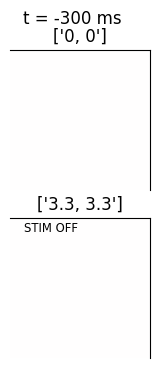

In [4]:
# making animation
locations = (['0, 0'], ['3.3, 3.3'])
f = plt.figure(figsize=(6, 4))
gs = mpl.gridspec.GridSpec(2, 1)

timestamps = np.linspace(-0.3, 1, 500)*1000 # 500 is artibitrary
stimOn = np.intersect1d(np.argwhere(timestamps > 0).ravel(), np.argwhere(timestamps < 100).ravel())


images = []
axes = []

for coord in range(2):
    ax = plt.subplot(gs[coord])
    im = plt.imshow(np.zeros((px, py)), clim=np.r_[-1, 1]*50, cmap='bwr', animated=True)
    ax = ptAL.plotting.apply_image_defaults(ax)
    stext = plt.text(0.1, 0.9, '', fontsize='small', transform=ax.transAxes, zorder=20)
    plt.title(locations[coord]) 
    
    axes.append(ax)
    images.append(im)

def animate(i):
    for coord in range(2):
        images[coord].set_array(locationMovies[coord, i]) 
        f.suptitle(f't = {timestamps[i]:.0f} ms')
        if np.isin(i, stimOn):
            stext.set_text('STIM ON')
            stext.set_color('red')
        else:
            stext.set_text('STIM OFF')
            stext.set_color('k')

anim = mpl.animation.FuncAnimation(f, animate, frames=n_samples-1, cache_frame_data=False, interval=250)
savedir = Path(r'C:\Users\nadia\OneDrive\Documents')
savepath = r'C:\Users\nadia\OneDrive\Documents\two powers.avi'
ptAL.plotting.anim_to_file(anim, str(savepath), rewrite=True, fps=25, bitrate=-1)
# ptAL.image.avi_to_gif(str(savepath), fps=4)

clear_output()
# plt.show()

In [37]:
# gif with 4 vids.

n_samples = 500
locationMovies = []
power3 = np.squeeze(np.argwhere(laserPowers==3.2))
coordinates = [[0,3.3],[3.3,3.3],[0,0],[3.3,0]] 

for i in coordinates:
    locX = np.squeeze(np.argwhere(galvoX==i[0]))
    locY = np.squeeze(np.argwhere(galvoY==i[1]))
    locIndexes = np.intersect1d(locX,locY)
    locIndexes = np.intersect1d(locIndexes, power3)
    locOntimes = laserOn[locIndexes]
    times = [np.linspace(-0.3+on, 1+on, n_samples) for on in locOntimes]
    times = np.squeeze(np.array(times))
    
    wf = np.mean(tToWf(times), axis=0)
    
    dwf = [np.diff(j, prepend=j[0]) for j in wf.T]
    dwf = np.array(dwf)
    mov = svdSpat @ dwf
    mov = mov.reshape(px, py, -1)
    
    locationMovies.append(mov.transpose(2, 0, 1))
locationMovies = np.array(locationMovies)


TypeError: The keyword `fps` is no longer supported. Use `duration`(in ms) instead, e.g. `fps=50` == `duration=20` (1000 * 1/50).

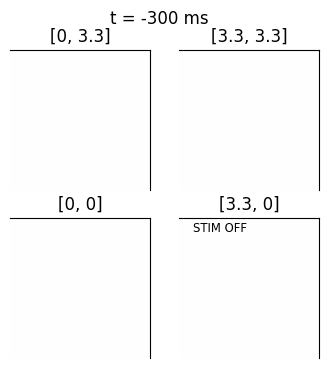

In [39]:
# making animation
f = plt.figure(figsize=(4, 4))
gs = mpl.gridspec.GridSpec(2, 2)

timestamps = np.linspace(-0.3, 1, 500)*1000 # 500 is artibitrary
stimOn = np.intersect1d(np.argwhere(timestamps > 0).ravel(), np.argwhere(timestamps < 100).ravel())

images = []
axes = []

for coord in range(4):
    ax = plt.subplot(gs[coord])
    im = plt.imshow(np.zeros((px, py)), clim=np.r_[-1, 1]*50, cmap='bwr', animated=True)
    ax = ptAL.plotting.apply_image_defaults(ax)
    stext = plt.text(0.1, 0.9, '', fontsize='small', transform=ax.transAxes, zorder=20)
    plt.title(coordinates[coord]) 
    
    axes.append(ax)
    images.append(im)

def animate(i):
    for coord in range(4):
        images[coord].set_array(locationMovies[coord, i]) 
        f.suptitle(f't = {timestamps[i]:.0f} ms')
        if np.isin(i, stimOn):
            stext.set_text('STIM ON')
            stext.set_color('red')
        else:
            stext.set_text('STIM OFF')
            stext.set_color('k')

anim = mpl.animation.FuncAnimation(f, animate, frames=n_samples-1, cache_frame_data=False, interval=250)
savedir = Path(r'C:\Users\nadia\OneDrive\Documents')
savepath = r'C:\Users\nadia\OneDrive\Documents\4locations2.gif'
ptAL.plotting.anim_to_file(anim, str(savepath), rewrite=True, fps=25, bitrate=-1)
ptAL.image.avi_to_gif(str(savepath), fps=4)

clear_output()
# plt.show()

pytoolsAL: Modules missing.  Not loading neuropixels.  Message: No module named 'slidingRP'


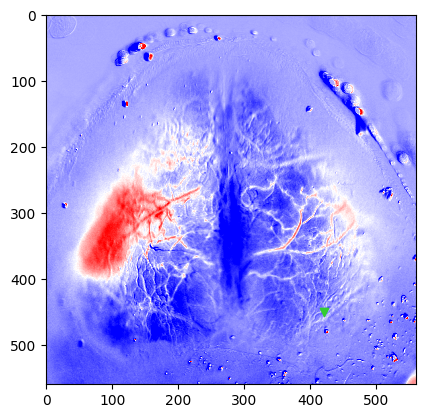

In [1]:
from wfOpto import *
wfOpto_719 = wfOpto(Path(r'Z:\Subjects\ZYE_0069\2023-07-19\1'))
wfOpto_719.fullAvg(-.2,.7,100)
plt.scatter([420],[450], c='limegreen', marker='v')

Text(2, 2.7, 'Position [0,0], Power 3.2')

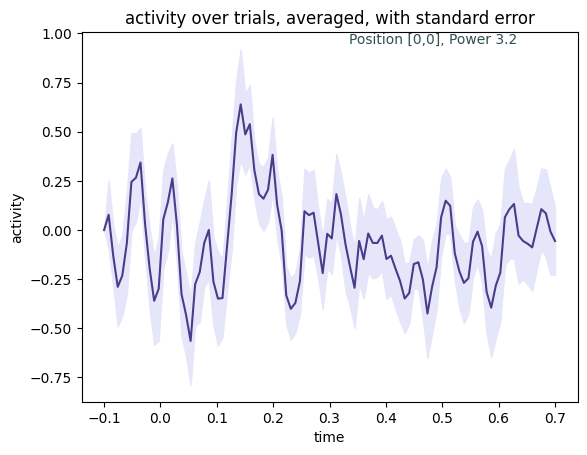

In [22]:
#standard error in trials with position 0,0

locX = np.squeeze(np.argwhere(galvoX==0))
locY = np.squeeze(np.argwhere(galvoY==0))
power3 = np.squeeze(np.argwhere(laserPowers==3.2))

locIndexes = np.intersect1d(locX,locY)
locIndexes = np.intersect1d(locIndexes,power3)
locOnTimes = laserOn[locIndexes]

pixelVals = np.zeros((333,100)) # will be 333x100
spatial = svdSpatFull.reshape(560*560, -1)
for trial in locIndexes:
    startTime = laserOn[trial] - .1
    endTime = laserOn[trial] + .7
    
    trial_time = np.linspace(startTime, endTime, 100)
    trial_activity = tToWf(trial_time)

    dwf = [np.diff(i, prepend=i[0]) for i in trial_activity.T]
    dwf = np.array(dwf)

    video = spatial @ dwf
    video = video.reshape(560, 560, -1)

    for timePt in range(100):
        pixelVals[trial][timePt] = video[420,450,timePt]

timeScale = np.linspace(-.1,.7,100)
plt.plot(timeScale,np.mean(pixelVals[:,:], axis=0),color='darkslateblue')
plt.fill_between(timeScale, \
                 np.mean(pixelVals[:,:], axis=0)-scipy.stats.sem(pixelVals[:,:],axis=0),\
                 np.mean(pixelVals[:,:],axis=0)+scipy.stats.sem(pixelVals[:,:],axis=0), color='lavender')
plt.xlabel("time")
plt.ylabel("activity")
plt.title("activity over trials, averaged, with standard error")
plt.text(2, 2.7, 'Position [0,0], Power 3.2',
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='darkslategrey', fontsize=10)

Text(2, 0.5, 'position [3.3,3.3], power 3.2')

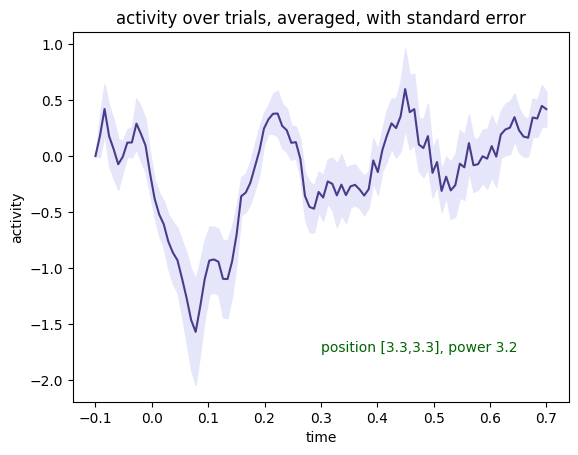

In [25]:
#standard error in trials with position 3.3,3.3

locX = np.squeeze(np.argwhere(galvoX==3.3))
locY = np.squeeze(np.argwhere(galvoY==3.3))
power3 = np.squeeze(np.argwhere(laserPowers==3.2))

locIndexes = np.intersect1d(locX,locY)
locIndexes = np.intersect1d(locIndexes,power3)
locOnTimes = laserOn[locIndexes]

pixelVals = np.zeros((333,100)) # will be 333x100
spatial = svdSpatFull.reshape(560*560, -1)
for trial in locIndexes:
    startTime = laserOn[trial] - .1
    endTime = laserOn[trial] + .7
    
    trial_time = np.linspace(startTime, endTime, 100)
    trial_activity = tToWf(trial_time)

    dwf = [np.diff(i, prepend=i[0]) for i in trial_activity.T]
    dwf = np.array(dwf)

    video = spatial @ dwf
    video = video.reshape(560, 560, -1)

    for timePt in range(100):
        pixelVals[trial][timePt] = video[420,450,timePt]

timeScale = np.linspace(-.1,.7,100)
plt.plot(timeScale,np.mean(pixelVals[:,:], axis=0),color='darkslateblue')
plt.fill_between(timeScale, \
                 np.mean(pixelVals[:,:], axis=0)-scipy.stats.sem(pixelVals[:,:],axis=0),\
                 np.mean(pixelVals[:,:],axis=0)+scipy.stats.sem(pixelVals[:,:],axis=0), color='lavender')
plt.xlabel("time")
plt.ylabel("activity")
plt.title("activity over trials, averaged, with standard error")
plt.text(2, .5, 'position [3.3,3.3], power 3.2',
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='darkgreen', fontsize=10)

Text(2, 0.3, 'Position [0,3.3], Power 3.2')

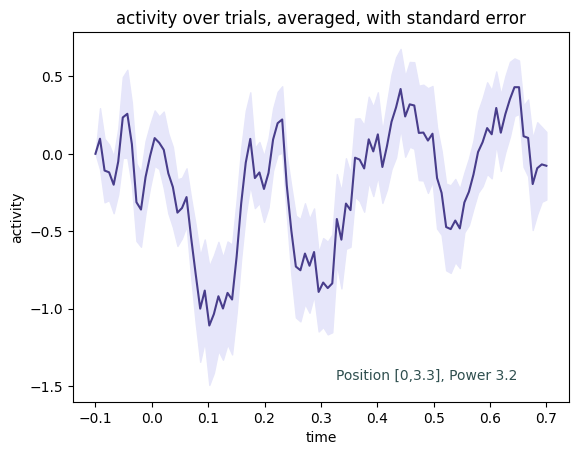

In [26]:
#standard error in trials with position 0,3.3

locX = np.squeeze(np.argwhere(galvoX==0))
locY = np.squeeze(np.argwhere(galvoY==3.3))
power3 = np.squeeze(np.argwhere(laserPowers==3.2))

locIndexes = np.intersect1d(locX,locY)
locIndexes = np.intersect1d(locIndexes,power3)
locOnTimes = laserOn[locIndexes]

pixelVals = np.zeros((333,100)) # will be 333x100
spatial = svdSpatFull.reshape(560*560, -1)
for trial in locIndexes:
    startTime = laserOn[trial] - .1
    endTime = laserOn[trial] + .7
    
    trial_time = np.linspace(startTime, endTime, 100)
    trial_activity = tToWf(trial_time)

    dwf = [np.diff(i, prepend=i[0]) for i in trial_activity.T]
    dwf = np.array(dwf)

    video = spatial @ dwf
    video = video.reshape(560, 560, -1)

    for timePt in range(100):
        pixelVals[trial][timePt] = video[420,450,timePt]

timeScale = np.linspace(-.1,.7,100)
plt.plot(timeScale,np.mean(pixelVals[:,:], axis=0),color='darkslateblue')
plt.fill_between(timeScale, \
                 np.mean(pixelVals[:,:], axis=0)-scipy.stats.sem(pixelVals[:,:],axis=0),\
                 np.mean(pixelVals[:,:],axis=0)+scipy.stats.sem(pixelVals[:,:],axis=0), color='lavender')
plt.xlabel("time")
plt.ylabel("activity")
plt.title("activity over trials, averaged, with standard error")
plt.text(2, .3, 'Position [0,3.3], Power 3.2',
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='darkslategrey', fontsize=10)

Text(2, 0.3, 'Position [3.3,0], Power 3.2')

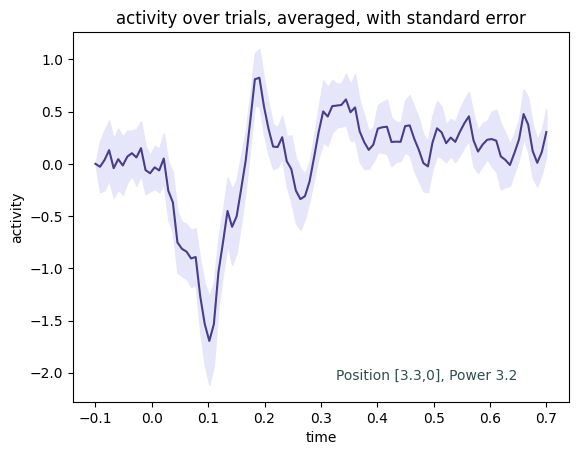

In [27]:
#standard error in trials with position 3.3,0

locX = np.squeeze(np.argwhere(galvoX==3.3))
locY = np.squeeze(np.argwhere(galvoY==0))
power3 = np.squeeze(np.argwhere(laserPowers==3.2))

locIndexes = np.intersect1d(locX,locY)
locIndexes = np.intersect1d(locIndexes,power3)
locOnTimes = laserOn[locIndexes]

pixelVals = np.zeros((333,100)) # will be 333x100
spatial = svdSpatFull.reshape(560*560, -1)
for trial in locIndexes:
    startTime = laserOn[trial] - .1
    endTime = laserOn[trial] + .7
    
    trial_time = np.linspace(startTime, endTime, 100)
    trial_activity = tToWf(trial_time)

    dwf = [np.diff(i, prepend=i[0]) for i in trial_activity.T]
    dwf = np.array(dwf)

    video = spatial @ dwf
    video = video.reshape(560, 560, -1)

    for timePt in range(100):
        pixelVals[trial][timePt] = video[420,450,timePt]

timeScale = np.linspace(-.1,.7,100)
plt.plot(timeScale,np.mean(pixelVals[:,:], axis=0),color='darkslateblue')
plt.fill_between(timeScale, \
                 np.mean(pixelVals[:,:], axis=0)-scipy.stats.sem(pixelVals[:,:],axis=0),\
                 np.mean(pixelVals[:,:],axis=0)+scipy.stats.sem(pixelVals[:,:],axis=0), color='lavender')
plt.xlabel("time")
plt.ylabel("activity")
plt.title("activity over trials, averaged, with standard error")
plt.text(2, .3, 'Position [3.3,0], Power 3.2',
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='darkslategrey', fontsize=10)